In [ ]:
!pip install mlxtend
import pandas as pd
import ast
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
# prompt: give me codes for drive mount

from google.colab import drive
drive.mount('/content/drive')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load and preprocess the dataset
file_path = '/content/drive/My Drive/[HSS407] Final project/trial/data_updated.csv'
data = pd.read_csv(file_path)
# data['hashtags'] = data['hashtags'].apply(ast.literal_eval)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Unnamed: 0             object
nb_comment            float64
nb_likes              float64
text                   object
sentiment_score       float64
sentiment_polarity     object
emojis                 object
emoji_count           float64
hashtags               object
top_hashtag_used       object
sentiment             float64
sentiment_category     object
dtype: object

In [ ]:
data = data[data['hashtags'].apply(lambda x: x != '[]')]
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,nb_comment,nb_likes,text,sentiment_score,sentiment_polarity,emojis,emoji_count,hashtags,top_hashtag_used,sentiment,sentiment_category
0,0,7.0,203.0,Got my notes and scripts ready for our qualify...,0.3612,0.2,NaN,0.0,"['usga', 'usopen', 'itshere']",False,0.200000,positive
1,1,10.0,579.0,🍇Blackberry Limeade🍹Protein Cake Bars are the ...,0.9451,0.31645833333333334,🍇🍹👌✌,4.0,"['Serious', 'njstramfam']",False,0.316458,positive
2,2,5.0,321.0,#TBT \nRemembering my first day in 2010 when @...,0.8906,0.41500000000000004,NaN,0.0,"['TBT', 'TeamAsics', 'TeamFrederick', 'Sponsor...",False,0.415000,positive
3,3,1.0,25.0,Enter now to win all 5 of our amazing VIP swag...,0.9710,0.8000000000000002,NaN,0.0,"['VegasMommyMeetup', 'the411mommas']",False,0.800000,positive
4,4,2.0,26.0,Went to help out in Monkeys kindergarten class...,0.8122,0.125,NaN,0.0,"['lemonade', 'teachers', 'teachergift', 'volun...",False,0.125000,positive
...,...,...,...,...,...,...,...,...,...,...,...,...
62542,62539,9.0,3054.0,"A day trip is not complete without a #Magnum, ...",0.0000,-0.05,NaN,0.0,['Magnum'],False,-0.050000,negative
62544,62541,0.0,14.0,#Repost from @youfoodz ・・・\nDid someone say br...,0.4090,0.3098011363636364,😍🍳🚛🍃,4.0,"['Repost', 'JoinTheFamily', 'NeverEatFrozenAga...",False,0.309801,positive
62545,62542,0.0,5.0,@GigiHadid looking gorgeous in a golden @micha...,0.7906,0.43333333333333335,NaN,0.0,"['cfda', 'cfdaawards', 'gigihadid', 'michaelko...",True,0.433333,positive
62546,62543,2.0,82.0,"Yes, please! Thanks, @sandhillwines @winebcdot...",0.8016,0.2,NaN,0.0,['howweroam'],False,0.200000,positive


In [ ]:
data['hashtags'] = data['hashtags'].astype(str)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data['hashtags'] = data['hashtags'].apply(lambda x: x.strip('] ').strip('[').replace("'", ""))
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,nb_comment,nb_likes,text,sentiment_score,sentiment_polarity,emojis,emoji_count,hashtags,top_hashtag_used,sentiment,sentiment_category
0,0,7.0,203.0,Got my notes and scripts ready for our qualify...,0.3612,0.2,NaN,0.0,"usga, usopen, itshere",False,0.200000,positive
1,1,10.0,579.0,🍇Blackberry Limeade🍹Protein Cake Bars are the ...,0.9451,0.31645833333333334,🍇🍹👌✌,4.0,"Serious, njstramfam",False,0.316458,positive
2,2,5.0,321.0,#TBT \nRemembering my first day in 2010 when @...,0.8906,0.41500000000000004,NaN,0.0,"TBT, TeamAsics, TeamFrederick, Sponsored, Athl...",False,0.415000,positive
3,3,1.0,25.0,Enter now to win all 5 of our amazing VIP swag...,0.9710,0.8000000000000002,NaN,0.0,"VegasMommyMeetup, the411mommas",False,0.800000,positive
4,4,2.0,26.0,Went to help out in Monkeys kindergarten class...,0.8122,0.125,NaN,0.0,"lemonade, teachers, teachergift, volunteer, ti...",False,0.125000,positive
...,...,...,...,...,...,...,...,...,...,...,...,...
62542,62539,9.0,3054.0,"A day trip is not complete without a #Magnum, ...",0.0000,-0.05,NaN,0.0,Magnum,False,-0.050000,negative
62544,62541,0.0,14.0,#Repost from @youfoodz ・・・\nDid someone say br...,0.4090,0.3098011363636364,😍🍳🚛🍃,4.0,"Repost, JoinTheFamily, NeverEatFrozenAgain, Ea...",False,0.309801,positive
62545,62542,0.0,5.0,@GigiHadid looking gorgeous in a golden @micha...,0.7906,0.43333333333333335,NaN,0.0,"cfda, cfdaawards, gigihadid, michaelkors, redc...",True,0.433333,positive
62546,62543,2.0,82.0,"Yes, please! Thanks, @sandhillwines @winebcdot...",0.8016,0.2,NaN,0.0,howweroam,False,0.200000,positive


In [ ]:
# Drop rows with NaN values in critical columns
data.dropna(subset=['nb_likes', 'hashtags'], inplace=True)
data = data[data['hashtags'].map(len) > 0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


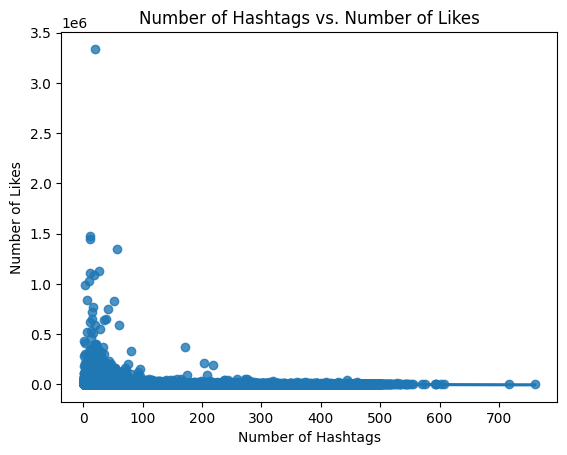

Correlation between number of hashtags and likes:               num_hashtags  nb_likes
num_hashtags      1.000000 -0.067896
nb_likes         -0.067896  1.000000


ValueError: empty vocabulary; perhaps the documents only contain stop words

In [ ]:
# Statistical Analysis of Hashtag Influence on Likes
data['num_hashtags'] = data['hashtags'].apply(len)
correlation = data[['num_hashtags', 'nb_likes']].corr()
sns.regplot(x='num_hashtags', y='nb_likes', data=data)
plt.title('Number of Hashtags vs. Number of Likes')
plt.xlabel('Number of Hashtags')
plt.ylabel('Number of Likes')
plt.show()
print("Correlation between number of hashtags and likes:", correlation)

# Advanced Clustering
data['hashtags_str'] = data['hashtags'].apply(lambda x: ' '.join(x))
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['hashtags_str'])

# Use the Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fit KMeans with the optimal number of clusters
optimal_clusters = 5  # Assuming 5 is optimal based on the Elbow graph
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
data['cluster'] = kmeans.fit_predict(X)
cluster_analysis = data.groupby('cluster')['nb_likes'].mean()
print("Average number of likes per cluster:", cluster_analysis)

# Association Rule Mining
te = TransactionEncoder()
te_ary = te.fit(data['hashtags']).transform(data['hashtags'])
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Filter rules based on lift and confidence
filtered_rules = rules[(rules['lift'] >= 2) & (rules['confidence'] >= 0.5)]
filtered_rules.sort_values(by='lift', ascending=False, inplace=True)
print("Top association rules:")
print(filtered_rules.head())

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# Use CountVectorizer to transform the hashtags column into a matrix of token counts
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(', '))
X = vectorizer.fit_transform(data['hashtags'])

# Convert to DataFrame for compatibility
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Target variable
y = data['nb_likes']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Feature importance
importance = model.feature_importances_
feature_importance = pd.Series(importance, index=vectorizer.get_feature_names_out()).sort_values(ascending=False)
print(f'Top 10 important hashtags:\n{feature_importance.head(10)}')

# Function to predict likes based on new hashtags
def predict_likes(hashtags):
    hashtags_str = ', '.join(hashtags)
    hashtags_vectorized = vectorizer.transform([hashtags_str])
    prediction = model.predict(hashtags_vectorized)
    return prediction[0]

# Example usage
example_hashtags = ['usga', 'usopen', 'itshere']
predicted_likes = predict_likes(example_hashtags)
print(f'Predicted likes for hashtags {example_hashtags}: {predicted_likes}')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
